### Import packages for statistical analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices

In [2]:
%matplotlib inline

### Load the Boston data set and check the columns

In [3]:
boston = sm.datasets.get_rdataset('Boston', 'MASS')
boston_df = boston.data

In [4]:
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Fit a simple linear regression model of `lstat` to `medv`

In [5]:
y, X = dmatrices('medv  ~ lstat', data=boston_df, return_type='dataframe')
mod = sm.OLS(y, X)
res = mod.fit()

Summary of the result of the regression:

In [6]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 15 Jun 2021   Prob (F-statistic):           5.08e-88
Time:                        16:47:54   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

Confidence intervals of the coefficients:

In [7]:
res.conf_int()

,0,1
Intercept,33.448457,35.659225
lstat,-1.026148,-0.873951


Predict `medv` for `lstat = [5, 10, 15]`:

In [8]:
res.predict([[1, 5], [1, 10], [1, 15]])

array([29.80359411, 25.05334734, 20.30310057])

Plot the data and regression line

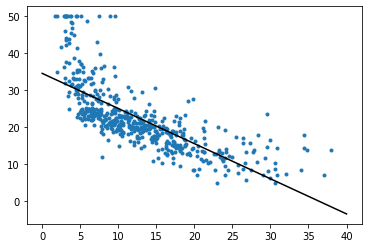

In [25]:
plt_num = 50
X_plot = np.stack([np.ones(plt_num), np.linspace(0, 40, num=plt_num)], axis=1)
plt.plot(X['lstat'], y, '.')
plt.plot(X_plot[:, 1], res.predict(X_plot), 'k')
plt.show()